In [16]:
import cv2

In [17]:
# 画像をダウンロードする
import urllib.request as req
url = "https://uta.pw/shodou/img/28/214.png"
req.urlretrieve(url, "test.png")

# OpenCVで読み込む
img = cv2.imread("test.png")
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [18]:
img = cv2.imread("存在しないファイル.png")
print(img)

None


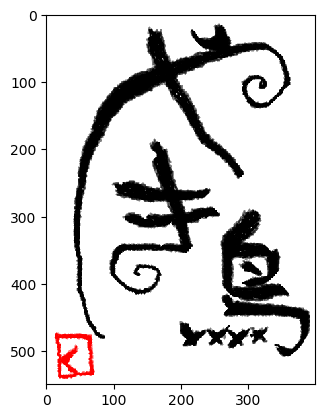

In [19]:
#ダウンロードした画像を表示する
import matplotlib.pyplot as plt
import cv2
img = cv2.imread("test.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

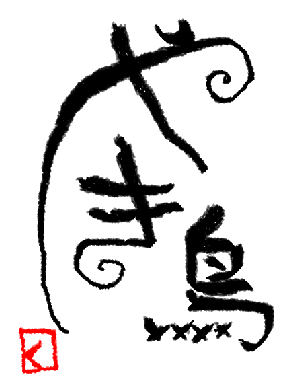

In [20]:
img = cv2.imread("test.png")
plt.axis("off") #axisを消す
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [21]:
#画像を保存する
import cv2
img = cv2.imread("test.png")
cv2.imwrite("out.png", img)

True

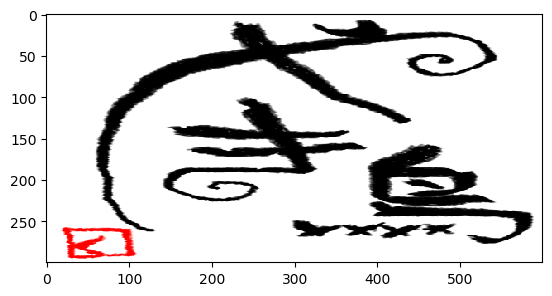

In [22]:
import matplotlib.pyplot as plt

# 画像を読み込み
img = cv2.imread("test.png")

# 画像をリサイズ
im2 = cv2.resize(img, (600, 300))

# リサイズした画像を保存
cv2.imwrite("out-resize.png", im2)

# 画像をリサイズして表示
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()

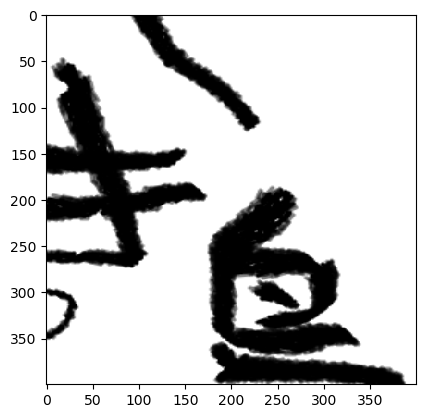

In [24]:
#画像を読み込み
img = cv2.imread("test.png")

# 画像の一部を切り取る
im2 = img[150:450, 150:450]

# 切り取った画像をリサイズ
im2 = cv2.resize(im2, (400, 400))

# 切り取った画像を保存
cv2.imwrite("cut-test.png", im2)

# 切り取った画像を表示
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()